<a href="https://colab.research.google.com/github/lindagouveia/LP1/blob/main/ProjetoNP3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Copa do Mundo**

Nesse projeto, utilizaremos o dataset https://www.kaggle.com/datasets/abecklas/fifa-world-cup para absorver dados de copas passadas e assim realizar uma análise descritiva e exploratória dos dados.

Primeiramente, precisamos entender que a base compreende a informação de vinte edições de Copa do Mundo, entre 1930 e 2014 - aqui cabe-se ressaltar que as edições de 1942 e 1946 não ocorreram em virtude da Segunda Guerra Mundial.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import plotly as py
import cufflinks as cf

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
players = pd.read_csv("/content/WorldCupPlayers.csv", encoding='utf-8')
matches = pd.read_csv("/content/WorldCupMatches.csv", encoding='utf-8')
world_cup = pd.read_csv("/content/WorldCups.csv", encoding='utf-8')

In [71]:
players.head()

,RoundID,MatchID,Team Initials,Coach Name,Line-up,Shirt Number,Player Name,Position,Event
0,201,1096.0,FRA,CAUDRON Raoul (FRA),S,0.0,Alex THEPOT,GK,-
1,201,1096.0,MEX,LUQUE Juan (MEX),S,0.0,Oscar BONFIGLIO,GK,-
2,201,1096.0,FRA,CAUDRON Raoul (FRA),S,0.0,Marcel LANGILLER,-,G40'
3,201,1096.0,MEX,LUQUE Juan (MEX),S,0.0,Juan CARRENO,-,G70'
4,201,1096.0,FRA,CAUDRON Raoul (FRA),S,0.0,Ernest LIBERATI,-,-


In [72]:
matches.head()

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,...,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials,TotalGols
0,1930.0,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4.0,1.0,Mexico,,...,3.0,0.0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201.0,1096.0,FRA,MEX,5.0
1,1930.0,13 Jul 1930 - 15:00,Group 4,Parque Central,Montevideo,USA,3.0,0.0,Belgium,,...,2.0,0.0,MACIAS Jose (ARG),MATEUCCI Francisco (URU),WARNKEN Alberto (CHI),201.0,1090.0,USA,BEL,3.0
2,1930.0,14 Jul 1930 - 12:45,Group 2,Parque Central,Montevideo,Yugoslavia,2.0,1.0,Brazil,,...,2.0,0.0,TEJADA Anibal (URU),VALLARINO Ricardo (URU),BALWAY Thomas (FRA),201.0,1093.0,YUG,BRA,3.0
3,1930.0,14 Jul 1930 - 14:50,Group 3,Pocitos,Montevideo,Romania,3.0,1.0,Peru,,...,1.0,0.0,WARNKEN Alberto (CHI),LANGENUS Jean (BEL),MATEUCCI Francisco (URU),201.0,1098.0,ROU,PER,4.0
4,1930.0,15 Jul 1930 - 16:00,Group 1,Parque Central,Montevideo,Argentina,1.0,0.0,France,,...,0.0,0.0,REGO Gilberto (BRA),SAUCEDO Ulises (BOL),RADULESCU Constantin (ROU),201.0,1085.0,ARG,FRA,1.0


In [73]:
world_cup.head()

,Year,Country,Winner,Runners-Up,Third,Fourth,GoalsScored,QualifiedTeams,MatchesPlayed,Attendance
0,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,590.549
1,1934,Italy,Italy,Czechoslovakia,Germany,Austria,70,16,17,363.000
2,1938,France,Italy,Hungary,Brazil,Sweden,84,15,18,375.700
3,1950,Brazil,Uruguay,Brazil,Sweden,Spain,88,13,22,1.045.246
4,1954,Switzerland,Germany,Hungary,Austria,Uruguay,140,16,26,768.607


**Limpeza de dados**

In [30]:
matches.dropna(subset=['Year'], inplace=True)

In [31]:
matches['TotalGols'] = matches['Home Team Goals'] + matches['Away Team Goals']

In [74]:
matches['Home Team Name'].value_counts()

Brazil                    82
Germany                   77
Italy                     57
Argentina                 54
England                   35
                          ..
Wales                      1
Norway                     1
United Arab Emirates       1
Haiti                      1
Bosnia and Herzegovina     1
Name: Home Team Name, Length: 77, dtype: int64

In [76]:
# Como vimos que na tabela matches alguns países na coluna 'Home Team Name' possúi a string 'rn">'
# vamos removemos esses caracteres

names = matches[matches['Home Team Name'].str.contains('rn">')]['Home Team Name'].value_counts()
wrong = list(names.index)
correct = [name.split('>')[1] for name in wrong]
correct

[]

In [77]:
# Verificamos também que temos alguns caracteres especiais como nesse caso o 'ã' em todas as nossas tabelas

old_name = ['Germany FR', 'Maracan� - Est�dio Jornalista M�rio Filho', 'Estadio do Maracana']
new_name = ['Germany', 'Maracan Stadium', 'Maracan Stadium']

wrong = wrong + old_name
correct = correct + new_name

#Aqui vemos como os dois ficam:
wrong, correct

(['Germany FR',
  'Maracan� - Est�dio Jornalista M�rio Filho',
  'Estadio do Maracana'],
 ['Germany', 'Maracan Stadium', 'Maracan Stadium'])

In [78]:
# Agora basta rodarmos na nossa lista para todos os campos "errados" em suas posições sejam modificados
# para os dados "corretos" na mesma posição

for index, wr in enumerate(wrong):
    world_cup = world_cup.replace(wrong[index], correct[index])
    
for index, wr in enumerate(wrong):
    matches = matches.replace(wrong[index], correct[index])
    
for index, wr in enumerate(wrong):
    players = players.replace(wrong[index], correct[index])

In [79]:
names = matches[matches['Home Team Name'].str.contains('rn">')]['Home Team Name'].value_counts()
names

Series([], Name: Home Team Name, dtype: int64)

In [80]:
players = players.replace([float('NaN')],'-')
matches = matches.replace([float('NaN')],'-')
world_cup = world_cup.replace([float('NaN')],'-')

**Visualização dos dados em relação as copas anteriores**

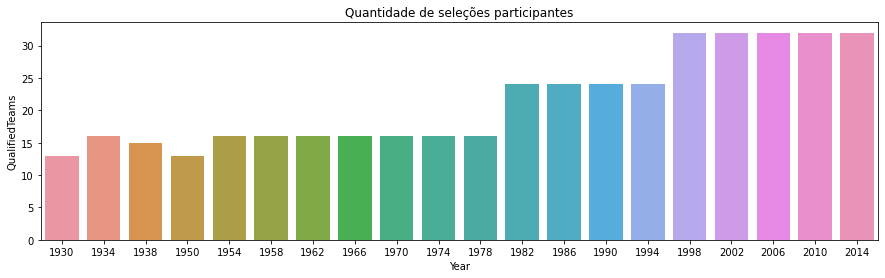

In [81]:
# Seleções participantes
plt.figure(figsize=(15,4))
sns.barplot(x='Year',y='QualifiedTeams', data=world_cup)
plt.title("Quantidade de seleções participantes",color='black')
plt.show()

Ao longo das edições das copas é possível perceber que o número de seleções participantes aumentou. Destaque para 1998, primeira edição com 32 participantes, quantidade mantida até hoje.

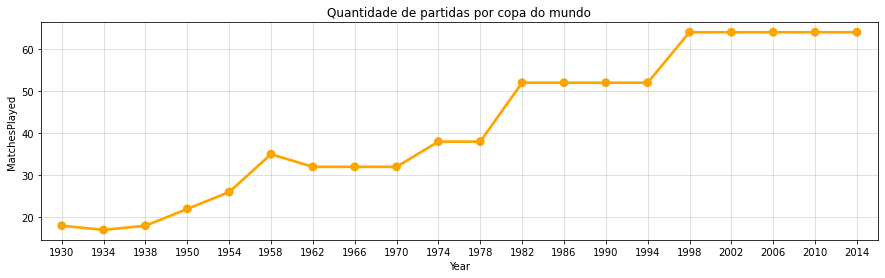

In [82]:
# Quantidade de partidas disputadas por copa do mundo
plt.figure(figsize=(15,4))
sns.pointplot(x='Year', y ='MatchesPlayed', data=world_cup, color="orange")
plt.grid(True,color="grey",alpha=.3)
plt.title("Quantidade de partidas por copa do mundo",color='black')
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



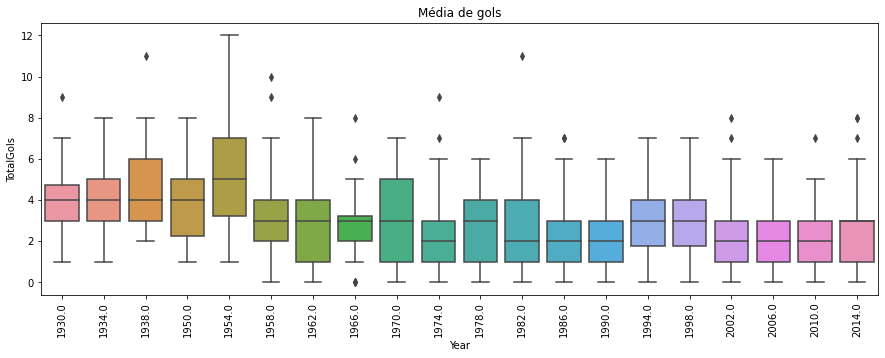

In [83]:
# Média de gols por copa do mundo
plt.figure(figsize=(15,5))
sns.boxplot(matches['Year'], matches['TotalGols'])
plt.title("Média de gols",color='black')
plt.xticks(rotation=90)
plt.show()

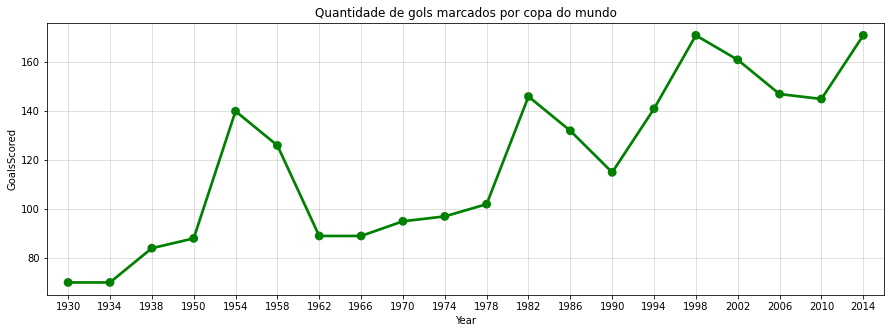

In [84]:
# Quantidade de gols marcados por copa do mundo
plt.figure(figsize=(15,5))
sns.pointplot(x='Year', y ='GoalsScored', data=world_cup, color="green")
plt.grid(True,color="grey",alpha=.3)
plt.title("Quantidade de gols marcados por copa do mundo",color='black')
plt.show()

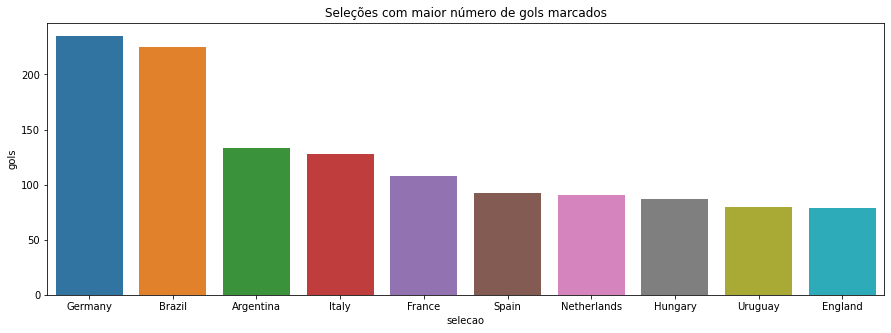

In [85]:
# Total de gols por seleção
gols_casa = matches.groupby("Home Team Name")["Home Team Goals"].sum().reset_index()
gols_casa.columns = ["selecao","gols"]
gols_fora = matches.groupby("Away Team Name")["Away Team Goals"].sum().reset_index()
gols_fora.columns = ["selecao","gols"]
gols = pd.concat([gols_casa, gols_fora],axis=0)
gols = gols.groupby("selecao")["gols"].sum().reset_index()
gols = gols.sort_values(by="gols",ascending =False)
gols["gols"] = gols["gols"].astype(int)

plt.figure(figsize=(15,5))
sns.barplot(x="selecao",y="gols", data=gols[:10])
plt.title("Seleções com maior número de gols marcados",color='black')
plt.show()

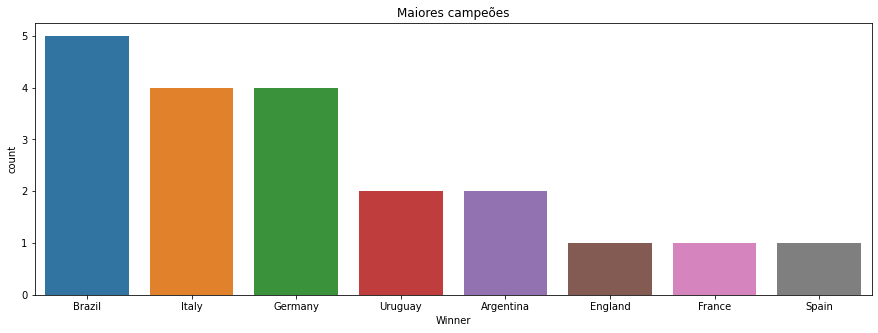

In [86]:
# maiores campeões da história da Copa do Mundo
winner = world_cup['Winner'].value_counts()

plt.figure(figsize=(15,5))
sns.countplot(x='Winner', data=world_cup, order=winner.index)
plt.title("Maiores campeões",color='black')
plt.show()

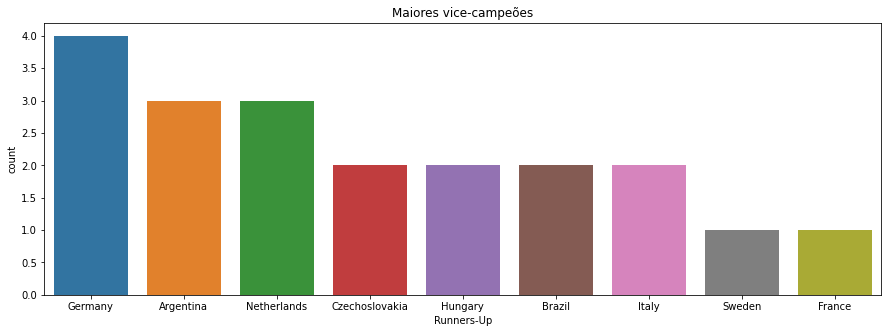

In [87]:
# Já aqui podemos visualizar com um gráfico os maiores vice-campeões da história da Copa do Mundo
runnerup = world_cup['Runners-Up'].value_counts()

plt.figure(figsize=(15,5))
sns.countplot(x='Runners-Up', data=world_cup, order=runnerup.index)
plt.title("Maiores vice-campeões",color='black')
plt.show()

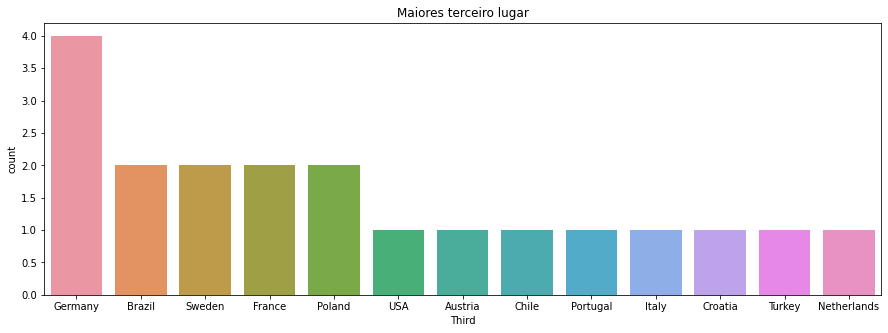

In [88]:
# Já aqui podemos visualizar com um gráfico aqueles que ficaram mais vezes na posição de terceiro lugares 
# na história da Copa do Mundo
third = world_cup['Third'].value_counts()

plt.figure(figsize=(15,5))
sns.countplot(x='Third', data=world_cup, order=third.index)
plt.title("Maiores terceiro lugar",color='black')
plt.show()

In [89]:
# Aqui, vamos concatenar as três colunas que estrutramos acima nos gráficos.
# Além disso, transformaremos todos os campos NAN's em 0 e transformaremos todos os valores em inteiros
teams = pd.concat([winner, runnerup, third], axis=1)
teams.fillna(0, inplace=True)
teams = teams.astype(int)
teams

,Winner,Runners-Up,Third
Brazil,5,2,2
Italy,4,2,1
Germany,4,4,4
Uruguay,2,0,0
Argentina,2,3,0
England,1,0,0
France,1,1,2
Spain,1,0,0
Netherlands,0,3,1
Czechoslovakia,0,2,0
